# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâ

In [1]:
#!pip install python-mecab-ko pyLDAvis

In [2]:
import numpy as np
import pandas as pd
import warnings # Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú

In [3]:
df = pd.read_csv('../datasets/oliveyoung_wemake_data.csv')
df[:2]

Unnamed: 0                          product_name review_name  \
0           0  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î≥¥Î¶¨Ïò§Îπ†   
1           1  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î∞îÎ≥¥Î∞îÎãà   

                                      review_content review_date review_rating  
0  ÏóÜÏúºÎ©¥ ÏïàÎê† ÏµúÍ≥†Ïùò dietÌÖú! ÌîºÏπòÎ≤àÏùÑ Ï∂îÏ≤úÌï©ÎãàÎãπ „Öé„Öé ÏÇ¨ÏßÑÏóî ÏóÜÏßÄÎßå 4ÌÜµÏß∏ Î®πÍ≥†...  2023.08.27      5Ï†êÎßåÏ†êÏóê 5Ï†ê  
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ÌïòÌä∏ ÎÑòÏòàÎªêÏöî. ÏûêÍ∏∞Ï†Ñ Î®πÍ≥† Ìö®Í≥ºÏûàÏúºÎ©¥ ÏñºÎßàÎÇò Ï¢ãÏùÑÍπåÏöî „Öú„Öú ÎÇòÏù¥Îì§ÏàòÎ°ù ...  2023.09.14      5Ï†êÎßåÏ†êÏóê 5Ï†ê

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589 entries, 0 to 4588
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4589 non-null   int64 
 1   product_name    4589 non-null   object
 2   review_name     4570 non-null   object
 3   review_content  3900 non-null   object
 4   review_date     4463 non-null   object
 5   review_rating   4423 non-null   object
dtypes: int64(1), object(5)
memory usage: 215.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
product_name        0
review_name        19
review_content    689
review_date       126
review_rating     166
dtype: int64

In [6]:
df_dropna = df.dropna()

In [7]:
df_dropna.isnull().sum()

Unnamed: 0        0
product_name      0
review_name       0
review_content    0
review_date       0
review_rating     0
dtype: int64

In [8]:
df_dropna[3:]

Unnamed: 0                                       product_name  \
3              3               [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   
4              4               [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   
5              5               [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   
6              6               [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   
7              7               [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   
...          ...                                                ...   
4583        1367  [4+1] ÎùΩÌÜ†ÌéòÎ¶∞ ÏÇ∞ÏñëÏú† Ï¥àÏú† Îã®Î∞±Ïßà Î∂ÑÎßê Ïä§Ìã± (2g x 30Ìè¨) / ÎÑ§ÎçúÎûÄÎìúÏÇ∞...   
4584        1368  [4+1] ÎùΩÌÜ†ÌéòÎ¶∞ ÏÇ∞ÏñëÏú† Ï¥àÏú† Îã®Î∞±Ïßà Î∂ÑÎßê Ïä§Ìã± (2g x 30Ìè¨) / ÎÑ§ÎçúÎûÄÎìúÏÇ∞...   
4585        1369  [4+1] ÎùΩÌÜ†ÌéòÎ¶∞ ÏÇ∞ÏñëÏú† Ï¥àÏú† Îã®Î∞±Ïßà Î∂ÑÎßê Ïä§Ìã± (2g x 30Ìè¨) / ÎÑ§ÎçúÎûÄÎìúÏÇ∞...   
4586        1370                           ÌÖåÏù¥ÌÅ¨Ìïè Îß•Ïä§ Î∞îÎÇòÎÇòÎßõ 250ml X 24ÏûÖ   
4587        1371                           ÌÖåÏù¥ÌÅ¨Ìïè Îß•Ïä§ Î∞îÎÇòÎÇòÎßõ 250ml X 24ÏûÖ   

     review_name                                     review_content  \
3           ÌûàÎìúÎèàÏù¥  Î®πÏúºÎ©¥ Îã¨Îã¨Ìïú ÏÇ¨ÌÉïÎßõÏù¥ ÎÇòÎäîÎç∞\n2-3Ï¥à Îπ®ÏïÑ Î®πÏúºÎ©¥ Îã¨Îã¨Íµ¨Î¶¨Îäî Îã§ ÎÖπÏïÑÏÑú ÎßõÏóÜÎäî ...   
4           Ïß±Íµ¨ÎçïÌú¥  Ìö®Í≥ºÎäî Î™®Î•¥Í≤†ÏßÄÎßå ÎçúÏ∞åÎäîÍ≤É Í∞ôÏïÑÏöî\nÏïåÏïΩÏù¥ Ïù¥ÏÅòÍ≥† ÏûÖÏïàÏóê Îì§Ïñ¥Í∞îÏùÑÎïå Ïó≠ÌïòÏßÄÏïäÏïÑÏÑú Ï¢ãÏäµÎãàÎã§   
5          ÌïòÎäòÏÉâÎ≤ΩÏßÄ  Ìö®Í≥ºÍ∞Ä Í∞ÄÏû• ÏûàÎäî Ï†úÌíàÏù∏ Í≤É Í∞ôÏïÑÏöî!\nÎÑàÎ¨¥ Ï¢ãÏäµÎãàÎã§!\nÏÑ∏ÏùºÍ∏∞Í∞ÑÎßå Í∏∞Îã§Î¶¨Í≥† ÏûàÏäµÎãà...   
6           IMIN  Ïó∞Îã¨ÏïÑÏÑú Î®πÏñ¥Ïïº Ìö®Í≥ºÎ•º ÏïåÌÖêÎç∞ ÏïΩ ÎïåÎ¨∏Ïóê Íæ∏Ï§ÄÌûà Î™ªÎ®πÏñ¥Î¥êÏÑú Ïûò Î™®Î•¥Í≤†Ïñ¥Ïöî Í∑∏ÎûòÎèÑ Ìòπ...   
7            ÏàòÏïÑÏß±              ÏãùÎã®ÎßåÏúºÎ°ú Î∂ÄÏ°±Ìï¥ÏÑú ÎèÑÏõÄÎ∞õÏúºÎ†§Í≥† Íµ¨Îß§ÌñàÏñ¥Ïöî ÏûêÍ∏∞ Ï†Ñ ÌïúÏïå Ïã†Í∏∞ÌïòÎÑ§Ïöî   
...          ...                                                ...   
4583  oke*******             ÏπúÏ†ïÏóÑÎßàÍªò ÎìúÎ¶¥Î†§Í≥† ÏÇΩÎãàÎã§.ÏÇ∞ÏñëÏú† ÎìúÏÖîÎ≥¥Í≥†Ïã∂Ïñ¥ÌïòÏÖîÏÑú Ï¢ãÏùÄÍ∏∞ÌöåÏù∏Í≤ÉÍ∞ôÏïÑÏöî   
4584   whg******   ÏÇ∞ÏñëÏú† Îã®Î∞±Ïßà Í¥ëÍ≥†Î≥¥Í≥† Ïñ¥Îñ§ÏßÄ Íµ¨Îß§Ìï¥Î¥§Ïñ¥Ïöî. ÎßéÏù¥ Îã¨ÏßÄÎèÑ ÏïäÍ≥† Î®πÍ∏∞ Ìé∏ÌïòÍ≥† Ï¢ãÎÑ§Ïöî.^^   
4585    app*****           Íæ∏Ï§ÄÌûà Î®πÍ≥†ÎäîÏûàÎäîÎç∞ Ïñ¥ÎîîÍ∞Ä Ï¢ãÏïÑÏßÄÎäîÍ±¥ÏßÄ..ÎßõÏûàÏñ¥ÏÑú Îß§Ïùº Ï±ôÍ≤®Î®πÍ≥†Îäî ÏûàÏñ¥Ïöî   
4586   jih******                       Î≠îÍ∞Ä ÎÅàÏ†ÅÍ±∞Î†§ÏÑú Î≥¥Îãà Ï†úÌíà ÌïòÎÇòÍ∞Ä Ï∞¢Ïñ¥Ï†∏ ÏûàÏóàÏñ¥Ïöî.   
4587     jsh****                                     Í∞ÄÍ≤© Î∞∞ÏÜ° Î™®Îëê ÎßåÏ°±Ìï©ÎãàÎã§   

     review_date review_rating  
3     2023.09.04      5Ï†êÎßåÏ†êÏóê 5Ï†ê  
4     2023.09.04      5Ï†êÎßåÏ†êÏóê 5Ï†ê  
5     2023.08.25      5Ï†êÎßåÏ†êÏóê 5Ï†ê  
6     2023.08.25      5Ï†êÎßåÏ†êÏóê 5Ï†ê  
7     2023.09.10      5Ï†êÎßåÏ†êÏóê 4Ï†ê  
...          ...           ...  
4583  2023.01.03           5.0  
4584  2022.12.14           4.0  
4585  2023.01.31           4.0  
4586  2023.09.20           3.0  
4587  2023.05.20           5.0  

[3810 rows x 6 columns]

## ÏûêÏó∞Ïñ¥ Ï†ÑÏ≤òÎ¶¨ 

### ÌòïÌÉúÏÜå Î∂ÑÏÑù

In [9]:
from konlpy.tag import Okt
okt = Okt()

In [10]:
content = list(df_dropna['review_content']) 

In [11]:
sentence = ' '.join(content) # ÌïúÏ§ÑÎ°ú ÎßåÎì§Í∏∞ 


In [12]:
word_tokens = okt.morphs(sentence)
word_tokens 

['ÏóÜÏúºÎ©¥',
 'ÏïàÎê†',
 'ÏµúÍ≥†',
 'Ïùò',
 'diet',
 'ÌÖú',
 '!',
 'ÌîºÏπò',
 'Î≤à',
 'ÏùÑ',
 'Ï∂îÏ≤ú',
 'Ìï©ÎãàÎãπ',
 '„Öé„Öé',
 'ÏÇ¨ÏßÑ',
 'Ïóî',
 'ÏóÜÏßÄÎßå',
 '4',
 'ÌÜµÏß∏',
 'Î®πÍ≥†',
 'ÏûàÏùÑÎßåÌÅº',
 'Ï∞ê',
 'ÌïÑÏàò',
 'ÌÖú',
 'Ïù¥',
 'ÎêòÏñ¥',
 'Î≤ÑÎ¶∞',
 'Ï†úÌíà',
 'Ïù¥ÏóêÏöî',
 'üíï',
 'Ï≤òÏùå',
 'Ïóî',
 'Í¥ëÍ≥†',
 'Îßå',
 'Î≥¥Í≥†',
 'Ìòπ',
 'Ìï¥ÏÑú',
 'Íµ¨Îß§',
 'ÌñàÎäîÎç∞',
 'Ìö®Í≥º',
 'Í∞Ä',
 'ÎÑàÎ¨¥',
 'Ï¢ãÏïÑÏÑú',
 'Í≥ÑÏÜç',
 'Ïû¨',
 'Íµ¨Îß§',
 'ÌïòÍ≥†',
 'ÏûàÎäî',
 'Ï†úÌíà',
 'ÏûÖÎãàÎãπ',
 '„Öé„Öé',
 '\\',
 'n',
 '\\',
 'n',
 'ÏïåÏïΩ',
 'ÏÇ¨Ïù¥Ï¶à',
 'Í∞Ä',
 'Ïïà',
 'Ïª§ÏÑú',
 'ÌïúÎ≤à',
 'Ïóê',
 'ÏÇºÌÇ§Í∏∞',
 'Ï¢ãÏïòÏñ¥Ïöî',
 '!',
 'ÏùÄÏùÄÌïòÍ≤å',
 'Î≥µÏà≠ÏïÑ',
 'Ìñ•',
 'Ïù¥',
 'ÎÇòÎäîÎç∞',
 'ÏÇ¨ÌÉï',
 'Ï≤òÎüº',
 'Î®πÎã§Í∞Ñ',
 'Ïì¥Îßõ',
 'Ïù¥',
 'Ïò¨ÎùºÏò§ÎãàÍπå',
 'Î¨¥Ï°∞Í±¥',
 'Î¨ºÏù¥',
 'Îûë',
 'Î∞îÎ°ú',
 'ÏÇºÌÇ§Îäî',
 'Í±∏',
 'Ï∂îÏ≤ú',
 'Ìï©ÎãàÎãπ',
 '\\',
 'n',
 '\\',
 'n',
 'Î®πÍ≥†ÎÇòÎ©¥',
 'Îã§Ïùå',
 'ÎÇ†',
 'Î™∏',
 'Ïù¥',
 'Í∞ÄÎ≤ºÏõåÏöî',
 '!!',
 'Ï†Ä',
 'ÎèÑ

In [13]:
okt.pos(sentence)

[('ÏóÜÏúºÎ©¥', 'Adjective'),
 ('ÏïàÎê†', 'Adjective'),
 ('ÏµúÍ≥†', 'Noun'),
 ('Ïùò', 'Josa'),
 ('diet', 'Alpha'),
 ('ÌÖú', 'Noun'),
 ('!', 'Punctuation'),
 ('ÌîºÏπò', 'Noun'),
 ('Î≤à', 'Noun'),
 ('ÏùÑ', 'Josa'),
 ('Ï∂îÏ≤ú', 'Noun'),
 ('Ìï©ÎãàÎãπ', 'Verb'),
 ('„Öé„Öé', 'KoreanParticle'),
 ('ÏÇ¨ÏßÑ', 'Noun'),
 ('Ïóî', 'Josa'),
 ('ÏóÜÏßÄÎßå', 'Adjective'),
 ('4', 'Number'),
 ('ÌÜµÏß∏', 'Noun'),
 ('Î®πÍ≥†', 'Verb'),
 ('ÏûàÏùÑÎßåÌÅº', 'Adjective'),
 ('Ï∞ê', 'Verb'),
 ('ÌïÑÏàò', 'Noun'),
 ('ÌÖú', 'Noun'),
 ('Ïù¥', 'Josa'),
 ('ÎêòÏñ¥', 'Verb'),
 ('Î≤ÑÎ¶∞', 'Verb'),
 ('Ï†úÌíà', 'Noun'),
 ('Ïù¥ÏóêÏöî', 'Josa'),
 ('üíï', 'Foreign'),
 ('Ï≤òÏùå', 'Noun'),
 ('Ïóî', 'Josa'),
 ('Í¥ëÍ≥†', 'Noun'),
 ('Îßå', 'Josa'),
 ('Î≥¥Í≥†', 'Noun'),
 ('Ìòπ', 'Noun'),
 ('Ìï¥ÏÑú', 'Verb'),
 ('Íµ¨Îß§', 'Noun'),
 ('ÌñàÎäîÎç∞', 'Verb'),
 ('Ìö®Í≥º', 'Noun'),
 ('Í∞Ä', 'Josa'),
 ('ÎÑàÎ¨¥', 'Adverb'),
 ('Ï¢ãÏïÑÏÑú', 'Adjective'),
 ('Í≥ÑÏÜç', 'Noun'),
 ('Ïû¨', 'Noun'),
 ('Íµ¨Îß§', 'Noun'),
 ('ÌïòÍ≥†', 'Josa'),
 ('ÏûàÎäî', '

### Î∂àÌïÑÏöîÌïú Ïã¨Î≥º ÏóÜÏï†Í∏∞ 

In [14]:
# ÏâºÌëú, ÏóîÌÑ∞ Îì±Îì±Ïùò Í∞í ÎåÄÏ≤¥ 
filtered_content = df_dropna['review_content'].replace('.', '').replace(',','').replace("'","").replace('¬∑', ' ').replace('=','').replace('\n','').replace('\\n',' ').replace('\\n\\n','  ')
list(filtered_content)

['ÏóÜÏúºÎ©¥ ÏïàÎê† ÏµúÍ≥†Ïùò dietÌÖú! ÌîºÏπòÎ≤àÏùÑ Ï∂îÏ≤úÌï©ÎãàÎãπ „Öé„Öé ÏÇ¨ÏßÑÏóî ÏóÜÏßÄÎßå 4ÌÜµÏß∏ Î®πÍ≥† ÏûàÏùÑÎßåÌÅº Ï∞ê ÌïÑÏàòÌÖúÏù¥ ÎêòÏñ¥Î≤ÑÎ¶∞ Ï†úÌíàÏù¥ÏóêÏöî üíï Ï≤òÏùåÏóî Í¥ëÍ≥†Îßå Î≥¥Í≥† ÌòπÌï¥ÏÑú Íµ¨Îß§ÌñàÎäîÎç∞ Ìö®Í≥ºÍ∞Ä ÎÑàÎ¨¥ Ï¢ãÏïÑÏÑú Í≥ÑÏÜç Ïû¨Íµ¨Îß§ÌïòÍ≥† ÏûàÎäî Ï†úÌíàÏûÖÎãàÎãπ „Öé„Öé\\n\\nÏïåÏïΩ ÏÇ¨Ïù¥Ï¶àÍ∞Ä ÏïàÏª§ÏÑú ÌïúÎ≤àÏóê ÏÇºÌÇ§Í∏∞ Ï¢ãÏïòÏñ¥Ïöî ! ÏùÄÏùÄÌïòÍ≤å Î≥µÏà≠ÏïÑÌñ•Ïù¥ ÎÇòÎäîÎç∞ ÏÇ¨ÌÉïÏ≤òÎüº Î®πÎã§Í∞Ñ Ïì¥ÎßõÏù¥ Ïò¨ÎùºÏò§ÎãàÍπå Î¨¥Ï°∞Í±¥ Î¨ºÏù¥Îûë Î∞îÎ°ú ÏÇºÌÇ§Îäî Í±∏ Ï∂îÏ≤úÌï©ÎãàÎãπ\\n\\nÎ®πÍ≥†ÎÇòÎ©¥ Îã§ÏùåÎÇ† Î™∏Ïù¥ Í∞ÄÎ≤ºÏõåÏöî !! Ï†ÄÎèÑ Ï≤òÏùåÏóî Í±∞ÏßìÎßêÏù∏ Ï§Ñ ÏïåÏïòÎäîÎç∞ ÏßÑÏßú Îçú Î∂ì_Í≥† „ÖÅ„ÖÅ„Ñ±ÎèÑ Îπ†Ï†∏ÏûàÏñ¥Ïöî ! ÏïåÏïΩÏùÑ Î®πÏúºÎ©¥ 870kcalÏ†ïÎèÑÎ•º ÌÉúÏõåÏ§ÄÎã§Îäî ÎßêÏù¥ ÏßÑÏßúÎÑ§Ïöî „Öé„Öé Ìö®Í≥ºÍ∞Ä Ï¢ãÏïÑÏÑú ÏûêÍæ∏ ÏÇ¨Î®πÎäî ÌîºÏπòÎ≤à >_< Îî•Ìä∏ÏóêÏÑú ÎÇòÏò® Ï†úÌíà Ï§ë Í∞ÄÏû• Ï¢ãÏïòÏäµÎãàÎã§ !\\n\\nÏ≤òÏùåÏóî Î®πÍ≥† Î™∏Ïù¥ ÏÇ¥Ïßù Îú®Í±∞ÏõåÏ°åÎäîÎç∞ ÏßÄÍ∏àÏùÄ Í∑∏Îü∞ Í≤å Ï†ÑÌòÄÏóÜÍµ¨Ïöî Î∞•ÏùÑ ÎßéÏù¥ Î®πÏùÄ ÎÇ† Ï±ôÍ≤®Î®πÍ∏∞ Ï¢ãÏïÑÏöî „Öé„

### Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ 

In [15]:
stop_words = pd.read_csv('../datasets/koreanStopwords.txt', header=None, encoding ='utf-8')
#stop_words = stop_words[0]
stop_words= stop_words[0].values

In [16]:
one_char_keyword = pd.read_csv('../datasets/one_char_list.txt', header=None, encoding ='utf-8')
one_char_keyword = one_char_keyword[0].values

In [17]:
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()

In [18]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Ìï®Ïàò Ï†ïÏùò
def remove_stopword(raw, pos=["Noun","Alpha","Verb","Number","Adjective"], stopword=stop_words):
    tokens = [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize Í∑∏Îû∞„Öã„Öè -> Í∑∏Îûò„Öã„Öã
            stem=True    # stemming Î∞îÎÄåÎÇò->Î∞îÎÄåÎã§
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]
    return ' '.join(tokens)  # Í≤∞Í≥º Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©ÌïòÏó¨ Î∞òÌôò

In [19]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Ìï®Ïàò Ï†ïÏùò(Î∂àÏö©Ïñ¥, ÌïúÍ∏ÄÏûê Ï≤òÎ¶¨)
def remove_stopword(raw, pos=["Noun","Alpha","Verb","Number","Adjective"], stopword=stop_words):
    tokens = []
    for word, tag in okt.pos(
        raw, 
        norm=True,   # normalize Í∑∏Îû∞„Öã„Öè -> Í∑∏Îûò„Öã„Öã
        stem=True    # stemming Î∞îÎÄåÎÇò->Î∞îÎÄåÎã§
    ):
        if len(word) > 1 and tag in pos and word not in stopword:
            tokens.append(word)
        elif len(word) == 1 and word in list(one_char_keyword):
            tokens.append(word)
    return ' '.join(tokens)  # Í≤∞Í≥º Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©ÌïòÏó¨ Î∞òÌôò

In [20]:
## Ìï®ÏàòÏ†ÅÏö© 
df_dropna['tokenized_review'] = df_dropna['review_content'].apply(remove_stopword)
df_dropna[:2]

C:\Users\02-19\AppData\Local\Temp\ipykernel_2476\949224158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['tokenized_review'] = df_dropna['review_content'].apply(remove_stopword)


Unnamed: 0                          product_name review_name  \
0           0  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î≥¥Î¶¨Ïò§Îπ†   
1           1  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î∞îÎ≥¥Î∞îÎãà   

                                      review_content review_date  \
0  ÏóÜÏúºÎ©¥ ÏïàÎê† ÏµúÍ≥†Ïùò dietÌÖú! ÌîºÏπòÎ≤àÏùÑ Ï∂îÏ≤úÌï©ÎãàÎãπ „Öé„Öé ÏÇ¨ÏßÑÏóî ÏóÜÏßÄÎßå 4ÌÜµÏß∏ Î®πÍ≥†...  2023.08.27   
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ÌïòÌä∏ ÎÑòÏòàÎªêÏöî. ÏûêÍ∏∞Ï†Ñ Î®πÍ≥† Ìö®Í≥ºÏûàÏúºÎ©¥ ÏñºÎßàÎÇò Ï¢ãÏùÑÍπåÏöî „Öú„Öú ÎÇòÏù¥Îì§ÏàòÎ°ù ...  2023.09.14   

  review_rating                                   tokenized_review  
0      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏµúÍ≥† diet ÌÖú ÌîºÏπò Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ Ï∞åÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨Îß§ Ìö®Í≥º Ï¢ã...  
1      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏïåÏïΩ ÌÜµÌÜµÏù¥ ÌïòÌä∏ ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ Îπ†ÏßÄÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ ...

In [22]:
# ÌôïÏù∏Ïö© 
test_sentence = "Ïù¥ Î¨∏Ïû•ÏùÄ Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨Í∞Ä ÎêòÏñ¥Ïïº Ìï©ÎãàÎã§. Í∞ÄÎã§ ÌïòÎã§ ÏûàÎã§ ÎêòÎã§ Î®πÎã§"
tokens_test = remove_stopword(test_sentence)
print(tokens_test)

Î¨∏Ïû• Ïö©Ïñ¥ Ï≤òÎ¶¨


### ÎπàÎèÑÏàò Í≥ÑÏÇ∞ 

In [23]:
from collections import Counter
from wordcloud import WordCloud

In [24]:
sentence_tokenized= ' '.join(list(df_dropna['tokenized_review'])) # ÌïúÏ§ÑÎ°ú ÎßåÎì§Í∏∞ 

In [25]:
sentence_split = sentence_tokenized.split()

In [26]:
# counterÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ï§ëÎ≥µ Ïó¨Î∂Ä count
count = Counter(sentence_split)

# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤ΩÏóê ÎßûÍ≤å Í≤ΩÎ°ú ÏàòÏ†ï)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #Ïù∏Ïä§ÌÑ¥Ïä§Ìôî 
wordCloud.generate_from_frequencies(count)

In [27]:
# count 
wordCloud.words_ 

{'Ï¢ãÎã§': 1.0,
 'Îßõ': 0.6010849909584087,
 'Ìö®Í≥º': 0.5649186256781193,
 'Íµ¨Îß§': 0.5511754068716094,
 'Ï†úÌíà': 0.5193490054249548,
 'ÎßõÏûàÎã§': 0.2730560578661845,
 'Ïö¥Îèô': 0.2683544303797468,
 'ÌôîÏû•Ïã§': 0.23110307414104883,
 'Íæ∏Ï§ÄÌïòÎã§': 0.23037974683544304,
 'ÏïåÏïΩ': 0.22459312839059675,
 'ÏÉùÍ∞Å': 0.19204339963833636,
 'ÏÑ≠Ï∑®': 0.1887884267631103,
 'ÎäêÎÇå': 0.18264014466546113,
 'Îπ†ÏßÄÎã§': 0.18083182640144665,
 'ÌïòÎ£®': 0.1786618444846293,
 'ÎèÑÏõÄ': 0.17721518987341772,
 'Ìé∏ÌïòÎã§': 0.17504520795660036,
 'ÌÅ¨Îã§': 0.16311030741410487,
 'Í∞ÄÍ≤©': 0.162748643761302,
 'Ïïå': 0.16021699819168173,
 'Ï†§Î¶¨': 0.15804701627486437,
 'Î≥¥Ï°∞': 0.13092224231464739,
 'ÌÅ¨Í∏∞': 0.12549728752260397,
 'Ï∂îÏ≤ú': 0.1236889692585895,
 'Î≥¥Í≥†': 0.11464737793851718,
 'Ìñ•': 0.11211573236889692,
 'ÎßéÎã§': 0.11175406871609403,
 'Ìè¨Ïû•': 0.10560578661844484,
 'Í¥ÄÎ¶¨': 0.1023508137432188,
 'Î≥µÏö©': 0.09981916817359855,
 'ÌõÑÍ∏∞': 0.09764918625678119,
 'ÏÑ±Î∂Ñ': 0.09403254972875

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
countVectorizer = CountVectorizer() # Ïù∏Ïä§ÌÑ¥Ïä§Ìôî
countVectorizer.fit(count)

CountVectorizer()

In [29]:
countVectorizer.vocabulary_  #ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î≤°ÌÑ∞Ìôî  #Îã®Ïñ¥-Ïù∏Îç±Ïä§ Îß§Ìïë
# ÌäπÏ†ï Îã®Ïñ¥Í∞Ä Î≤°ÌÑ∞Ïùò Ïñ¥Îñ§ ÏúÑÏπòÏóê Ìï¥ÎãπÌïòÎäîÏßÄÎ•º ÌååÏïÖÌïòÎäî Îç∞ ÎèÑÏõÄ

{'ÏµúÍ≥†': 5118,
 'diet': 250,
 'ÌîºÏπò': 5661,
 'Ï∂îÏ≤ú': 5136,
 'ÏÇ¨ÏßÑ': 2830,
 'ÌÜµÏß∏': 5406,
 'Ï∞åÎã§': 4974,
 'ÌïÑÏàò': 5671,
 'Ï†úÌíà': 4656,
 'Í¥ëÍ≥†': 780,
 'Î≥¥Í≥†': 2479,
 'Íµ¨Îß§': 806,
 'Ìö®Í≥º': 5957,
 'Ï¢ãÎã§': 4707,
 'ÏïåÏïΩ': 3551,
 'ÏÇ¨Ïù¥Ï¶à': 2820,
 'ÌÅ¨Îã§': 5306,
 'ÏÇºÌÇ§Îã§': 2877,
 'ÏùÄÏùÄÌïòÎã§': 4120,
 'Î≥µÏà≠ÏïÑ': 2521,
 'ÏÇ¨ÌÉï': 2833,
 'Ïì¥Îßõ': 3420,
 'Ïò¨ÎùºÏò§Îã§': 3895,
 'Î¨ºÏù¥': 2201,
 'Í∞ÄÎ≥çÎã§': 402,
 'Í±∞ÏßìÎßê': 576,
 'Îπ†ÏßÄÎã§': 2740,
 '870': 202,
 'kcal': 281,
 'ÌÉúÏö∞Îã§': 5365,
 'ÏÇ¨Î®πÎã§': 2798,
 'Îî•Ìä∏': 1682,
 'Îú®Í≤ÅÎã§': 1755,
 'Ï†ÑÌòÄ': 4556,
 'ÏïàÎÇ®Îã§': 3496,
 'Ìï†Ïù∏': 5748,
 'ÌÜµÌÜµÏù¥': 5409,
 'ÌïòÌä∏': 5711,
 'ÏòàÏÅòÎã§': 3838,
 'ÎÇòÏù¥': 1123,
 'ÏåìÏù¥ÎÑ§': 3390,
 'ÏóâÏóâ': 3726,
 'Ï¢ÖÎ•òÏÖãÌä∏': 4698,
 'Î¨∂Ïù¥Îã§': 2173,
 'Î¶¨Î∑∞': 1849,
 'Ïì∞Îã§': 3410,
 'ÎìúÎùºÎßàÌã±ÌïòÎã§': 1645,
 'Îã¨ÎùºÏßÄÎã§': 1395,
 'ÏûêÍ∏∞': 4357,
 'Ï£ÑÏ±ÖÍ∞ê': 4717,
 'ÎçúÎã§': 1519,
 'ÏùòÎØ∏': 4146,
 'Ïö¥Îèô': 4017,
 'ÏãùÎã®': 3280,
 'Î≥ëÌñâ': 2476

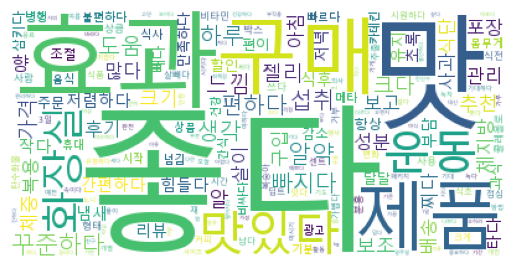

In [30]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


## ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ 

### Ïú†ÏÇ¨Ïñ¥ ÎåÄÏπò 

In [32]:
df_replace_list = pd.read_csv('../datasets/replace_list.csv')
df_replace_list[:3]

before_replacement after_replacement
0              diet              Îã§Ïù¥Ïñ¥Ìä∏ 
1                Îã§ÏößÌä∏             Îã§Ïù¥Ïñ¥Ìä∏ 
2                 Ïñ¥Ìä∏             Îã§Ïù¥Ïñ¥Ìä∏

In [33]:
def replace_word(tokenized_review):
    replaced_review = str()
    for i in range(len(df_replace_list['before_replacement'])):
        try:
          # ÏπòÌôòÌï† Îã®Ïñ¥Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ ÏπòÌôò ÏàòÌñâ
          if df_replace_list['before_replacement'][i] in tokenized_review:
            tokenized_review = tokenized_review.replace(df_replace_list['before_replacement'][i], df_replace_list['after_replacement'][i])
        except Exception as e:
            print(f"Error Î∞úÏÉù / ÏóêÎü¨Î™Ö: {e}")
    return tokenized_review

In [34]:
## ÌôïÏù∏Ïö© 
replace_word('Ïñ¥Ìä∏ stess ÏÇ¥Ïù¥ Îπ†ÏßÄÎã§ ÌîºÏπò Îã¨Îã¨ Îã®Îßõ')

'Îã§Ïù¥Ïñ¥Ìä∏  Ïä§Ìä∏Î†àÏä§ Ï≤¥Ï§ë ÎπºÎã§ Î≥µÏà≠ÏïÑ Îã¨Îã¨ÌïòÎã§ Îã¨Îã¨ÌïòÎã§'

In [35]:
df_dropna['replaced_review'] = df_dropna['tokenized_review'].apply(replace_word)
df_dropna[:2]

C:\Users\02-19\AppData\Local\Temp\ipykernel_2476\365916842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['replaced_review'] = df_dropna['tokenized_review'].apply(replace_word)


Unnamed: 0                          product_name review_name  \
0           0  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î≥¥Î¶¨Ïò§Îπ†   
1           1  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î∞îÎ≥¥Î∞îÎãà   

                                      review_content review_date  \
0  ÏóÜÏúºÎ©¥ ÏïàÎê† ÏµúÍ≥†Ïùò dietÌÖú! ÌîºÏπòÎ≤àÏùÑ Ï∂îÏ≤úÌï©ÎãàÎãπ „Öé„Öé ÏÇ¨ÏßÑÏóî ÏóÜÏßÄÎßå 4ÌÜµÏß∏ Î®πÍ≥†...  2023.08.27   
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ÌïòÌä∏ ÎÑòÏòàÎªêÏöî. ÏûêÍ∏∞Ï†Ñ Î®πÍ≥† Ìö®Í≥ºÏûàÏúºÎ©¥ ÏñºÎßàÎÇò Ï¢ãÏùÑÍπåÏöî „Öú„Öú ÎÇòÏù¥Îì§ÏàòÎ°ù ...  2023.09.14   

  review_rating                                   tokenized_review  \
0      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏµúÍ≥† diet ÌÖú ÌîºÏπò Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ Ï∞åÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨Îß§ Ìö®Í≥º Ï¢ã...   
1      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏïåÏïΩ ÌÜµÌÜµÏù¥ ÌïòÌä∏ ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ Îπ†ÏßÄÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ ...   

                                     replaced_review  
0  ÏµúÍ≥† Îã§Ïù¥Îã§Ïù¥Ïñ¥Ìä∏  ÌÖú Î≥µÏà≠ÏïÑ Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ ÎäòÏñ¥ÎÇòÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨...  
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ Ï¢ãÎã§ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ ÎπºÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ Î≥¥Í≥†...

## Í∏ç/Î∂ÄÏ†ï ÎåìÍ∏Ä Î∂ÑÎ¶¨ 

In [36]:
import re
df_dropna['rating'] = df_dropna['review_rating'].str.extract(r'(\s\d(?=Ï†ê))|(\d.\d)').apply(lambda x: ''.join(x.dropna()), axis=1)
df_dropna[:2]

C:\Users\02-19\AppData\Local\Temp\ipykernel_2476\2451109038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['rating'] = df_dropna['review_rating'].str.extract(r'(\s\d(?=Ï†ê))|(\d.\d)').apply(lambda x: ''.join(x.dropna()), axis=1)


Unnamed: 0                          product_name review_name  \
0           0  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î≥¥Î¶¨Ïò§Îπ†   
1           1  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î∞îÎ≥¥Î∞îÎãà   

                                      review_content review_date  \
0  ÏóÜÏúºÎ©¥ ÏïàÎê† ÏµúÍ≥†Ïùò dietÌÖú! ÌîºÏπòÎ≤àÏùÑ Ï∂îÏ≤úÌï©ÎãàÎãπ „Öé„Öé ÏÇ¨ÏßÑÏóî ÏóÜÏßÄÎßå 4ÌÜµÏß∏ Î®πÍ≥†...  2023.08.27   
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ÌïòÌä∏ ÎÑòÏòàÎªêÏöî. ÏûêÍ∏∞Ï†Ñ Î®πÍ≥† Ìö®Í≥ºÏûàÏúºÎ©¥ ÏñºÎßàÎÇò Ï¢ãÏùÑÍπåÏöî „Öú„Öú ÎÇòÏù¥Îì§ÏàòÎ°ù ...  2023.09.14   

  review_rating                                   tokenized_review  \
0      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏµúÍ≥† diet ÌÖú ÌîºÏπò Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ Ï∞åÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨Îß§ Ìö®Í≥º Ï¢ã...   
1      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏïåÏïΩ ÌÜµÌÜµÏù¥ ÌïòÌä∏ ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ Îπ†ÏßÄÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ ...   

                                     replaced_review rating  
0  ÏµúÍ≥† Îã§Ïù¥Îã§Ïù¥Ïñ¥Ìä∏  ÌÖú Î≥µÏà≠ÏïÑ Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ ÎäòÏñ¥ÎÇòÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨...      5  
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ Ï¢ãÎã§ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ ÎπºÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ Î≥¥Í≥†...      5

In [37]:
##  'rating' Ïó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
df_dropna['rating'] = pd.to_numeric(df_dropna['rating'])

C:\Users\02-19\AppData\Local\Temp\ipykernel_2476\2779142316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['rating'] = pd.to_numeric(df_dropna['rating'])


In [38]:
condition_positive =  df_dropna['rating'] >= 4 # Í∏çÏ†ï
condition_negative = df_dropna['rating'] < 3  # Î∂ÄÏ†ï

In [39]:
df_review_positive = df_dropna[condition_positive]
df_review_negative= df_dropna[condition_negative]

In [40]:
df_review_positive[:2]

Unnamed: 0                          product_name review_name  \
0           0  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î≥¥Î¶¨Ïò§Îπ†   
1           1  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Î∞îÎ≥¥Î∞îÎãà   

                                      review_content review_date  \
0  ÏóÜÏúºÎ©¥ ÏïàÎê† ÏµúÍ≥†Ïùò dietÌÖú! ÌîºÏπòÎ≤àÏùÑ Ï∂îÏ≤úÌï©ÎãàÎãπ „Öé„Öé ÏÇ¨ÏßÑÏóî ÏóÜÏßÄÎßå 4ÌÜµÏß∏ Î®πÍ≥†...  2023.08.27   
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ÌïòÌä∏ ÎÑòÏòàÎªêÏöî. ÏûêÍ∏∞Ï†Ñ Î®πÍ≥† Ìö®Í≥ºÏûàÏúºÎ©¥ ÏñºÎßàÎÇò Ï¢ãÏùÑÍπåÏöî „Öú„Öú ÎÇòÏù¥Îì§ÏàòÎ°ù ...  2023.09.14   

  review_rating                                   tokenized_review  \
0      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏµúÍ≥† diet ÌÖú ÌîºÏπò Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ Ï∞åÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨Îß§ Ìö®Í≥º Ï¢ã...   
1      5Ï†êÎßåÏ†êÏóê 5Ï†ê  ÏïåÏïΩ ÌÜµÌÜµÏù¥ ÌïòÌä∏ ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ Îπ†ÏßÄÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ ...   

                                     replaced_review  rating  
0  ÏµúÍ≥† Îã§Ïù¥Îã§Ïù¥Ïñ¥Ìä∏  ÌÖú Î≥µÏà≠ÏïÑ Ï∂îÏ≤ú ÏÇ¨ÏßÑ ÌÜµÏß∏ ÎäòÏñ¥ÎÇòÎã§ ÌïÑÏàò ÌÖú Ï†úÌíà Í¥ëÍ≥† Î≥¥Í≥† Íµ¨...     5.0  
1  ÏïåÏïΩ ÌÜµÌÜµÏù¥ Ï¢ãÎã§ÏòàÏÅòÎã§ Ìö®Í≥º Ï¢ãÎã§ ÎÇòÏù¥ ÎπºÎã§ ÏåìÏù¥ÎÑ§ ÏóâÏóâ Îî•Ìä∏ Ï¢ÖÎ•òÏÖãÌä∏ Î¨∂Ïù¥Îã§ Î≥¥Í≥†...     5.0

In [41]:
df_review_negative[:2]

Unnamed: 0                          product_name review_name  \
48          48  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   byeol****   
58          58  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Îü¨Î∏îÎ¶¨Ïú§   

                                       review_content review_date  \
48  ÏÜîÏßÅÌûà Ìö®Í≥º 1ÎèÑ ÏóÜÎäî Í≤É Í∞ôÏïÑÏöî! ÏïåÏïΩÏúºÎ°ú ÏÇ¥Î∫Ñ Ïàò ÏûàÎã§ÎäîÍ≤å ÎßêÏù¥ ÏïàÎêòÎäîÎç∞ ÌòπÌï¥ÏÑú...  2023.09.16   
58  Ïùå.. Ï†ÄÎäî ÏùºÏ£ºÏùºÏ†ïÎèÑ Î≥µÏö©ÌïòÎã§Í∞Ä Ï§ëÎã®Ïù¥ÏóêÏöî\n\nÎØºÍ∞êÌïú ÌîºÎ∂ÄÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ÏÑú Í∑∏Îü∞...  2023.08.06   

   review_rating                                   tokenized_review  \
48      5Ï†êÎßåÏ†êÏóê 1Ï†ê                                      Ìö®Í≥º ÏïåÏïΩ ÏÇ¥ÎπºÎã§ ÏïÑÍπùÎã§   
58      5Ï†êÎßåÏ†êÏóê 2Ï†ê  ÏùºÏ£ºÏùº Î≥µÏö© Ï§ëÎã® ÎØºÍ∞êÌïòÎã§ ÌîºÎ∂Ä 2Ïùº ÏßÄÎÇòÎã§ ÏñºÍµ¥ Ìä∏Îü¨Î∏î Ïò¨ÎùºÏò§Îã§ ÏãúÏûë Îã®ÏàúÌïòÎã§ ÏÑ§...   

                                      replaced_review  rating  
48                                      Ìö®Í≥º ÏïåÏïΩ ÏÇ¥ÎπºÎã§ ÏïÑÍπùÎã§     1.0  
58  ÏùºÏ£ºÏùº Î≥µÏö© Ï§ëÎã® ÎØºÍ∞êÌïòÎã§ ÌîºÎ∂Ä 2Ïùº ÏßÄÎÇòÎã§ ÏñºÍµ¥ Ìä∏Îü¨Î∏î Ïò¨ÎùºÏò§Îã§ ÏãúÏûë Îã®ÏàúÌïòÎã§ ÏÑ§...     2.0

## LDA Î∂ÑÏÑù

In [42]:
from gensim.corpora import Dictionary

In [43]:
dictionary = Dictionary(df_review_negative[['replaced_review']].values)
dictionary

In [44]:
dictionary.doc2bow(df_review_negative[['replaced_review']].values[3])

[(3, 1)]

In [45]:
# dictionaryÏóê ÏùòÌïú ÌïúÍ∏Ä Î¨∏Ïû•ÏùÑ Î≤°ÌÑ∞Ìôî Î≥ÄÌôò
corpus_list = list()
for sentence in df_review_negative[['replaced_review']].values :
    vectors = dictionary.doc2bow(sentence)
    corpus_list.append(vectors)

In [46]:
df_review_negative['Vectorization'] = corpus_list
df_review_negative[:3]

C:\Users\02-19\AppData\Local\Temp\ipykernel_2476\350940733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_negative['Vectorization'] = corpus_list


Unnamed: 0                          product_name review_name  \
48          48  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)   byeol****   
58          58  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)        Îü¨Î∏îÎ¶¨Ïú§   
59          59  [Ï£ºÌòÑÏòÅ, Ïù¥ÎÇòÏó∞ Ï∞êÌÖú]Îî•Ìä∏ 3Ïùº ÌîºÏπò(Îßõ)Î≤à 30Ï†ï (30ÏùºÎ∂Ñ)  Ïó¨Î¶ÑÎÆ§Ìä∏Í≤®Ïö∏Î∏åÎùºÏù¥Ìä∏   

                                       review_content review_date  \
48  ÏÜîÏßÅÌûà Ìö®Í≥º 1ÎèÑ ÏóÜÎäî Í≤É Í∞ôÏïÑÏöî! ÏïåÏïΩÏúºÎ°ú ÏÇ¥Î∫Ñ Ïàò ÏûàÎã§ÎäîÍ≤å ÎßêÏù¥ ÏïàÎêòÎäîÎç∞ ÌòπÌï¥ÏÑú...  2023.09.16   
58  Ïùå.. Ï†ÄÎäî ÏùºÏ£ºÏùºÏ†ïÎèÑ Î≥µÏö©ÌïòÎã§Í∞Ä Ï§ëÎã®Ïù¥ÏóêÏöî\n\nÎØºÍ∞êÌïú ÌîºÎ∂ÄÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ÏÑú Í∑∏Îü∞...  2023.08.06   
59  Ïù¥Í±∞ Î®πÍ≥† ÏûêÎ©¥ ÏΩîÍ∞Ä ÎßâÌûàÍ≥† Î™©Ïù¥ Î∂ÄÏñ¥Ïöî....Î®πÍ≥† ÏûêÍ≥† ÎÇòÏÑú Í≥ÑÏÜç ÏïÑÌååÏÑú Î®πÏùÑ Ïàò...  2023.08.31   

   review_rating                                   tokenized_review  \
48      5Ï†êÎßåÏ†êÏóê 1Ï†ê                                      Ìö®Í≥º ÏïåÏïΩ ÏÇ¥ÎπºÎã§ ÏïÑÍπùÎã§   
58      5Ï†êÎßåÏ†êÏóê 2Ï†ê  ÏùºÏ£ºÏùº Î≥µÏö© Ï§ëÎã® ÎØºÍ∞êÌïòÎã§ ÌîºÎ∂Ä 2Ïùº ÏßÄÎÇòÎã§ ÏñºÍµ¥ Ìä∏Îü¨Î∏î Ïò¨ÎùºÏò§Îã§ ÏãúÏûë Îã®ÏàúÌïòÎã§ ÏÑ§...   
59      5Ï†êÎßåÏ†êÏóê 1Ï†ê                                   ÎßâÌûàÎã§ Î∂ÄÏñ¥ ÏûêÍ≥† ÏïÑÌîÑÎã§ ÏàòÍ∞Ä   

                                      replaced_review  rating Vectorization  
48                                      Ìö®Í≥º ÏïåÏïΩ ÏÇ¥ÎπºÎã§ ÏïÑÍπùÎã§     1.0      [(0, 1)]  
58  ÏùºÏ£ºÏùº Î≥µÏö© Ï§ëÎã® ÎØºÍ∞êÌïòÎã§ ÌîºÎ∂Ä 2Ïùº ÏßÄÎÇòÎã§ ÏñºÍµ¥ Ìä∏Îü¨Î∏î Ïò¨ÎùºÏò§Îã§ ÏãúÏûë Îã®ÏàúÌïòÎã§ ÏÑ§...     2.0      [(1, 1)]  
59                                   ÎßâÌûàÎã§ Î∂ÄÏñ¥ ÏûêÍ≥† ÏïÑÌîÑÎã§ ÏàòÍ∞Ä     1.0      [(2, 1)]

## ÌÜ†ÌîΩ Ïû°Í∏∞ 

In [47]:
from gensim.models import LdaModel

In [48]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [49]:
lda_model.print_topics(num_words=4)

[(0,
  '0.026*"ÏÜåÌôîÎèÑ Ïª§Ìîº ÏãùÏ¥à ÏãúÌÇ§Îã§ ÌÉÄÎèÑ ÌÉÑÏÇ∞Ïàò ÌÉÄÎèÑ ÏïåÏΩîÏò¨ ÎÉÑÏÉà Ïã¨ÌïòÎã§ ÏßÑÌïòÎã§ Ìù¨Îã§ ÌúòÎ∞ú ÎÉÑÏÉà ÎπÑÏä∑ÌïòÎã§ ÎßõÏûàÎã§ ÌÉÄÎã§ Í±¥Í∞Ä" + 0.019*"Í∞ÄÍ≤© ÎπÑÏã∏Îã§ Ïã∏Îã§ Ï†úÎ∞ú" + 0.017*"ÌÖÄÎ∏îÎü¨ Ïù¥ÏÅòÎã§ Íµ¨Îß§ Î∂àÎüâ Î¨ºÏù¥ ÎöùÎöù ÌùêÎ•¥Îã§ ÌóàÎã§ Í≤ÄÏàò Ï¢ãÎã§ Î≥¥ÎÇ¥Îã§" + 0.017*"ÎπÑÏã∏Îã§ ÍπåÏä¨ÌïòÎã§ Ìö®Í≥º"'),
 (1,
  '0.053*"Í∞ÄÍ≤© ÎπÑÏã∏Îã§ Ïã∏Îã§ Ï†úÎ∞ú" + 0.018*"Î∞∞ÏÜ° ÎàÑÎùΩ Î∞∞ÏÜ° Í∞ÄÍπåÏù¥ Í±∏Î¶¨Îã§ Î∞∞ÏÜ° Î™®Ïñë Í∞úÏÑ† ÏùòÏßÄ ÏïÑÏòà ÎÅÑÎã§ Îß§Î≤à Î≥ÄÎ™Ö Í∏∏Ïñ¥ÏßÄÎã§" + 0.018*"ÌÉùÎ∞∞ ÏÉÅÏûê ÏÇ¨Ïù¥Ï¶à ÎåÄÏ∂© ÎßûÏ∂îÎã§ ÌÖåÏù¥ÌîÑ ÏÉÅÏûê Ïó¥Î¶¨Îã§ Î∂ôÏù¥ Ï†úÌíà" + 0.018*"ÏÇºÌÇ§Îã§ ÌûòÎì§Îã§ Î™©Íµ¨Î©ç Í±∏Î¶¨Îã§ Î¨¥ÏÑ≠Îã§ Í∞ïÏ†ú ÏÇºÌÇ§Îã§ Ï§çÎã§ Ìö®Í≥º"'),
 (2,
  '0.055*"Í∞ÄÍ≤© ÎπÑÏã∏Îã§ Ïã∏Îã§ Ï†úÎ∞ú" + 0.027*"Ï∑®Ìñ• Ìñ• Îßõ ÎãπÌô© Î©∞Ïπ† Ï∞∏Í≥† Ï†ÅÏùë Í±¥ÏßÄÎã§ Íæ∏Ï§ÄÌïòÎã§ ÌÇ¨Î°ú ÎπºÎã§" + 0.017*"ÏãùÏÇ¨ ÏÜåÏãù Ï°∞Ï†à ÏÑ≠Ï∑® Î≥µÎ∂Ä ÌåΩÎßåÍ∞ê Í∞ÄÏä§ Ï∞®Í≥† ÏÑ∏Ìä∏ Í∞úÏù∏ Ìö®Í≥º Ï†ÑÌòÄ" + 0.017*"Î©∞Ïπ† ÏùåÏãù Ìö®Í≥º Ï¢ãÎã§ Íµ¨Îß§ Í∞ÄÏä§ Ï∞®Í≥† ÏÜå

## ÌÜ†ÌîΩ Î∂ÑÏÑù 

### LDA ÏãúÍ∞ÅÌôî 

In [51]:
#%pip install pyLDAvis

In [52]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [53]:
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)
pyLDAvis.display(result_visualized)

In [54]:
pyLDAvis.save_html(result_visualized, './result_visualized_negative.html')

## LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ 

In [55]:
NUM_TOPICS = 10 # ÌÜ†ÌîΩ Í∞úÏàòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
# passes: Îî•Îü¨ÎãùÏóêÏÑú EpochÏôÄ Í∞ôÏùÄ Í∞úÎÖêÏúºÎ°ú, Ï†ÑÏ≤¥ corpusÎ°ú Î™®Îç∏ ÌïôÏäµ ÌöüÏàò Í≤∞Ï†ï
PASSES = 15

### Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò 

In [56]:
def lda_modeling(review_prep):
    # Îã®Ïñ¥ Ïù∏ÏΩîÎî© Î∞è ÎπàÎèÑÏàò Í≥ÑÏÇ∞
    dictionary = corpora.Dictionary(replaced_review)
    corpus = [dictionary.doc2bow(review) for review in replaced_review]
    # LDA Î™®Îç∏ ÌïôÏäµ
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics = NUM_TOPICS, 
                                            id2word = dictionary, 
                                            passes = PASSES)
    return model, corpus, dictionary

### ÌÜ†ÌîΩÎ≥Ñ Îã®Ïñ¥ Íµ¨ÏÑ± Ï∂úÎ†• Ìï®Ïàò 

In [57]:
def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./result/topic_prop_' + RATING +  '.xlsx')
    display(topic_prop)

### ÏãúÍ∞ÅÌôî Ìï®Ïàò 

In [58]:
def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    # ÏãúÍ∞ÅÌôî Í≤∞Í≥º Ï†ÄÏû•
    RESULT_FILE = './result/lda_result_' + RATING + '.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

### Í∏çÏ†ïÏ†ï Î¶¨Î∑∞ ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ 

In [61]:
# Í∏çÏ†ïÏ†Å Î¶¨Î∑∞(ÌèâÏ†ê 5Ï†ê ÎßåÏ†ê Í∏∞Ï§Ä 4, 5Ï†ê)
review_pos = df_dropna[(4 == df_dropna['rating']) | (df_dropna['rating'] == 5)]['replaced_review']
# Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞(ÌèâÏ†ê 5Ï†ê ÎßåÏ†ê Í∏∞Ï§Ä 1, 2Ï†ê)
review_neg = df_dropna[(1 == df_dropna['rating']) | (df_dropna['rating'] == 2)]['replaced_review']

In [ ]:
model, corpus, dictionary = lda_modeling(review_prep_pos)
NUM_WORDS = 10